In [21]:
from google.cloud import storage
import pandas as pd

bucket_name = "nobu_w266_final_project"

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)

# When you have your files in a subfolder of the bucket.
my_prefix = "OECD_file/" # the name of the subfolder
blobs = bucket.list_blobs(prefix = my_prefix, delimiter = '/')

for blob in blobs:
    if(blob.name != my_prefix): # ignoring the subfolder itself 
        file_name = blob.name.replace(my_prefix, "")
        blob.download_to_filename(file_name) # download the file to the machine
        df = pd.read_csv(file_name, delimiter="|") # load the data
        print(df)

          appln_id        app_nbr  filing  tech_field  many_field  \
0         16427085  EP19780100001    1978        16.0           1   
1         16427086  EP19780100002    1978        31.0           0   
2         16427087  EP19780100003    1978        32.0           1   
3         16427088  EP19780100004    1978        14.0           1   
4         16427089  EP19780100005    1978         8.0           0   
...            ...            ...     ...         ...         ...   
3507894  506385435  EP20190405001    2019         8.0           1   
3507895  506385437  EP20190405002    2019        24.0           0   
3507896  507537560  EP20190460001    2019        35.0           0   
3507897  505638106  EP20190461501    2019         1.0           1   
3507898  506424754  EP20190700348    2019         6.0           0   

         patent_scope  family_size  grant_lag  bwd_cits  npl_cits  ...  \
0                   3            7     1203.0         4         0  ...   
1                   1  

In [22]:
# Now try to pull the patent data combining 2 files to accumulate 10 years
from google.cloud import storage
import pandas as pd

bucket_name = "nobu_w266_final_project"

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)

# When you have your files in a subfolder of the bucket.
my_prefix = "Patent_EP/" # the name of the subfolder
blobs = bucket.list_blobs(prefix = my_prefix, delimiter = '/')

patent_data_combine = None

for blob in blobs:
    if(blob.name != my_prefix): # ignoring the subfolder itself 
        file_name = blob.name.replace(my_prefix, "")
        blob.download_to_filename(file_name) # download the file to the machine
        patent_data = pd.read_csv(file_name) # load the data
        # print(patent_data)
        if patent_data_combine is None:
            patent_data_combine = patent_data
        else:
            patent_data_combine = patent_data_combine.append(patent_data)

In [23]:
patent_data_combine.sort_values('filing_date')

,publication_number,application_number,text,filing_date
161697,EP-2393505-A1,EP-10705790-A,The present invention relates to the use of a ...,20100102
11332,EP-2376972-A1,EP-10708886-A,"A parallel-sighted, image-reversing prism syst...",20100102
52710,EP-2384189-A2,EP-10726819-A,Improved compositions for tissue augmentation ...,20100103
74016,EP-2374013-A2,EP-10708389-A,Apparatus for radiation mapping of a region co...,20100103
157739,EP-2374128-A2,EP-10703964-A,A device for recording at least part of a data...,20100103
...,...,...,...,...
16172,EP-3572775-A2,EP-19193474-A,A switch control circuit and method for an ele...,20190823
19388,EP-3569717-A2,EP-19194106-A,The present invention is directed to a diagnos...,20190828
19389,EP-3569717-A2,EP-19194106-A,The present invention is directed to a diagnos...,20190828
12887,EP-3564854-A1,EP-19196510-A,Embodiments of the present invention provide a...,20190910


In [24]:
patent_data_combine['new_appl_nbr'] = 'EP20' + patent_data_combine['application_number'].str[3:5] + '0' + patent_data_combine['application_number'].str[5:-2]

In [25]:
patent_data_combine

,publication_number,application_number,text,filing_date,new_appl_nbr
0,EP-2493772-A1,EP-10773469-A,This invention pertains to a U-board split cas...,20101020,EP20100773469
1,EP-2496032-A1,EP-10826481-A,To transmit simultaneously a reference signal ...,20101004,EP20100826481
2,EP-2610125-A1,EP-10856430-A,A vehicle control device includes a diesel eng...,20100826,EP20100856430
3,EP-2436619-A2,EP-11190626-A,"A vertical conveyor system (150A, 150B) for tr...",20100412,EP20110190626
4,EP-2813266-A2,EP-14172995-A,A fire suppression system (20) includes a cont...,20100825,EP20140172995
...,...,...,...,...,...
19963,EP-3517373-A1,EP-19152079-A,A seatbelt pretensioning retractor assembly fo...,20190116,EP20190152079
19964,EP-3566652-A1,EP-19172131-A,A system and method for constructing virtual r...,20190501,EP20190172131
19965,EP-3566652-A1,EP-19172131-A,A system and method for constructing virtual r...,20190501,EP20190172131
19966,EP-3545862-A2,EP-19165960-A,A method of compressing tissue during a surgic...,20190328,EP20190165960


In [26]:
patent_data_combine.drop_duplicates(subset='new_appl_nbr', keep = 'first', inplace = True)
patent_data_combine

,publication_number,application_number,text,filing_date,new_appl_nbr
0,EP-2493772-A1,EP-10773469-A,This invention pertains to a U-board split cas...,20101020,EP20100773469
1,EP-2496032-A1,EP-10826481-A,To transmit simultaneously a reference signal ...,20101004,EP20100826481
2,EP-2610125-A1,EP-10856430-A,A vehicle control device includes a diesel eng...,20100826,EP20100856430
3,EP-2436619-A2,EP-11190626-A,"A vertical conveyor system (150A, 150B) for tr...",20100412,EP20110190626
4,EP-2813266-A2,EP-14172995-A,A fire suppression system (20) includes a cont...,20100825,EP20140172995
...,...,...,...,...,...
19957,EP-3567539-A1,EP-19171027-A,Distributing resources in a predetermined geog...,20190425,EP20190171027
19960,EP-3527317-A1,EP-19156479-A,Embodiments of hybrid engine welding systems a...,20190211,EP20190156479
19962,EP-3517373-A1,EP-19152079-A,A seatbelt pretensioning retractor assembly fo...,20190116,EP20190152079
19964,EP-3566652-A1,EP-19172131-A,A system and method for constructing virtual r...,20190501,EP20190172131


In [27]:
df_merge = pd.merge(patent_data_combine, df, left_on='new_appl_nbr', right_on='app_nbr', how='inner')

In [28]:
df_merge

,publication_number,application_number,text,filing_date,new_appl_nbr,appln_id,app_nbr,filing,tech_field,many_field,...,fwd_cits7,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6
0,EP-2493772-A1,EP-10773469-A,This invention pertains to a U-board split cas...,20101020,EP20100773469,328773105,EP20100773469,2010,25.0,0,...,0,0,NaN,NaN,NaN,0.602041,0.000000,4.0,0.396296,0.393637
1,EP-2496032-A1,EP-10826481-A,To transmit simultaneously a reference signal ...,20101004,EP20100826481,333779641,EP20100826481,2010,4.0,1,...,0,0,NaN,NaN,NaN,0.839506,0.111111,NaN,NaN,NaN
2,EP-2610125-A1,EP-10856430-A,A vehicle control device includes a diesel eng...,20100826,EP20100856430,341900782,EP20100856430,2010,32.0,0,...,0,0,NaN,NaN,NaN,0.867139,0.224490,NaN,NaN,NaN
3,EP-2436619-A2,EP-11190626-A,"A vertical conveyor system (150A, 150B) for tr...",20100412,EP20110190626,339215521,EP20110190626,2010,25.0,0,...,9,4,NaN,NaN,0.180000,0.764543,0.157895,NaN,NaN,NaN
4,EP-2813266-A2,EP-14172995-A,A fire suppression system (20) includes a cont...,20100825,EP20140172995,419197262,EP20140172995,2010,24.0,0,...,6,2,NaN,NaN,0.104938,0.887755,0.571429,9.0,0.420142,0.298506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130300,EP-3512074-A1,EP-19150413-A,The invention relates to a permanent magnet ro...,20190104,EP20190150413,505250492,EP20190150413,2019,1.0,0,...,0,0,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
1130301,EP-3514984-A1,EP-19152912-A,The invention provides a method for determinin...,20190121,EP20190152912,506365616,EP20190152912,2019,3.0,0,...,0,0,NaN,NaN,NaN,0.908163,0.857143,NaN,NaN,NaN
1130302,EP-3514738-A1,EP-19152968-A,A demand prediction apparatus configured to pr...,20190122,EP20190152968,506385155,EP20190152968,2019,7.0,0,...,0,0,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN
1130303,EP-3514451-A1,EP-19151645-A,The present invention relates generally to a f...,20190114,EP20190151645,505895332,EP20190151645,2019,1.0,0,...,0,0,NaN,NaN,NaN,0.843750,0.375000,NaN,NaN,NaN


In [29]:
df_merge_quality = df_merge[(df_merge['quality_index_6'] >=0) & (len(df_merge['text']) >0)]
df_merge_quality

,publication_number,application_number,text,filing_date,new_appl_nbr,appln_id,app_nbr,filing,tech_field,many_field,...,fwd_cits7,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6
0,EP-2493772-A1,EP-10773469-A,This invention pertains to a U-board split cas...,20101020,EP20100773469,328773105,EP20100773469,2010,25.0,0,...,0,0,NaN,NaN,NaN,0.602041,0.000000,4.0,0.396296,0.393637
4,EP-2813266-A2,EP-14172995-A,A fire suppression system (20) includes a cont...,20100825,EP20140172995,419197262,EP20140172995,2010,24.0,0,...,6,2,NaN,NaN,0.104938,0.887755,0.571429,9.0,0.420142,0.298506
5,EP-2255683-B1,EP-10163204-A,The device has an application device (47) for ...,20100519,EP20100163204,315607513,EP20100163204,2010,34.0,0,...,1,1,NaN,NaN,NaN,0.642361,0.416667,9.0,0.278788,0.367996
6,EP-2262981-B1,EP-10711585-A,The invention relates to a bimetallic valve fo...,20100329,EP20100711585,298884917,EP20100711585,2010,27.0,0,...,0,0,NaN,NaN,NaN,0.842951,0.675676,7.0,0.300938,0.450909
7,EP-2462850-B1,EP-10194739-A,The present invention concerns a beverage prep...,20101213,EP20100194739,329540694,EP20100194739,2010,33.0,0,...,1,1,NaN,NaN,0.000000,0.668639,0.461538,9.0,0.273246,0.367701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129085,EP-3346246-A1,EP-18150116-A,Systems and methods for icing resistant total ...,20180102,EP20180150116,488117740,EP20180150116,2018,10.0,0,...,0,0,NaN,NaN,NaN,0.720000,0.600000,1.0,0.281746,0.206609
1129096,EP-3407148-A1,EP-18156651-A,Provided is a highly convenient communication ...,20180214,EP20180156651,489969681,EP20180156651,2018,12.0,1,...,0,0,NaN,NaN,NaN,0.710744,0.363636,1.0,0.357143,0.267411
1129125,EP-3388275-A1,EP-18165679-A,A control device of a four-wheel-drive vehicle...,20180404,EP20180165679,492667799,EP20180165679,2018,31.0,1,...,0,0,NaN,NaN,NaN,0.856099,0.378378,1.0,0.277778,0.292488
1129149,EP-3372398-A1,EP-18159484-A,Roller blind of a sheet material having a sand...,20180301,EP20180159484,490863830,EP20180159484,2018,21.0,0,...,0,0,NaN,NaN,NaN,0.000000,1.000000,1.0,0.274074,0.180979


In [30]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

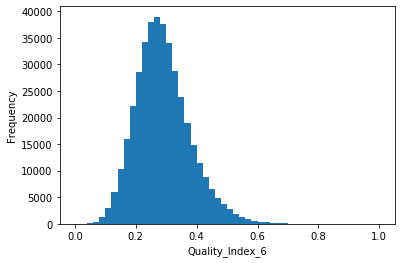

In [32]:
plt.hist(df_merge_quality['quality_index_6'], density=False, range=(0,1), bins=50)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('Quality_Index_6');

In [10]:
#
#conditions = [
#    (df_merge_quality['quality_index_6'] >= 0) & (df_merge_quality['quality_index_6'] < 0.15),
#    (df_merge_quality['quality_index_6'] >= 0.15) & (df_merge_quality['quality_index_6'] < 0.3),
#    (df_merge_quality['quality_index_6'] >= 0.3) & (df_merge_quality['quality_index_6'] < 0.45),
#    (df_merge_quality['quality_index_6'] >= 0.45) & (df_merge_quality['quality_index_6'] < 0.6),
#    (df_merge_quality['quality_index_6'] >= 0.6)
#]

#choices = ['0', '1', '2', '3', '4']
#**//

In [33]:

conditions = [
    (df_merge_quality['quality_index_6'] >= 0) & (df_merge_quality['quality_index_6'] < 0.2),
    (df_merge_quality['quality_index_6'] >= 0.2) & (df_merge_quality['quality_index_6'] < 0.3),
    (df_merge_quality['quality_index_6'] >= 0.3)
]

choices = ['0', '1', '2']


In [10]:
#conditions = [
#
#    (df_merge_quality['quality_index_6'] < 0.3),
#    (df_merge_quality['quality_index_6'] >= 0.3)
#]

#choices = ['0', '1']

In [34]:
import numpy as np
df_merge_quality['quality_rank'] = np.select(condlist=conditions, choicelist=choices)

/home/nobu_yamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df_merge_quality['quality_rank'].value_counts()

1    177237
2    164572
0     59232
Name: quality_rank, dtype: int64

In [36]:
import numpy as np
import pandas as pd
import pickle as cPickle
from collections import defaultdict
import re

from bs4 import BeautifulSoup

import sys
import os
import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed
from keras.models import Model

from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers

Using TensorFlow backend.


In [37]:
MAX_SENT_LENGTH = 30
MAX_SENTS = 3
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [38]:
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\\", "", string)    
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()

In [39]:
data_train = df_merge_quality.sample(frac=1)[:5000]
data_train

,publication_number,application_number,text,filing_date,new_appl_nbr,appln_id,app_nbr,filing,tech_field,many_field,...,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank
663283,EP-3020041-A1,EP-14732876-A,There are two representations for Higher Order...,20140624,EP20140732876,419627289,EP20140732876,2014,6.0,1,...,1,NaN,NaN,0.420000,0.500000,0.500000,4.0,0.558510,0.410391,2
408034,EP-2739504-A1,EP-12745816-A,Disclosed is a rail guide that has at least on...,20120801,EP20120745816,365844624,EP20120745816,2012,32.0,1,...,0,NaN,NaN,0.277778,0.769231,0.500000,6.0,0.310568,0.368551,2
442295,EP-2839719-A1,EP-13777655-A,Disclosed herein is an illumination system inc...,20130419,EP20130777655,411653229,EP20130777655,2013,6.0,1,...,0,NaN,NaN,NaN,0.773333,0.466667,6.0,0.293487,0.275362,1
290436,EP-2617780-A1,EP-12197437-A,Provided is an image forming method capable of...,20121217,EP20120197437,379135748,EP20120197437,2012,19.0,1,...,0,NaN,NaN,NaN,0.769083,0.567568,6.0,0.161419,0.212807,1
309415,EP-2761383-A1,EP-12837130-A,"Systems and methods of controlling a heating, ...",20120727,EP20120837130,405267264,EP20120837130,2012,30.0,1,...,0,NaN,NaN,NaN,0.890306,0.571429,6.0,0.341270,0.348119,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661984,EP-3049804-A1,EP-14752851-A,The invention relates to a chromatography colu...,20140815,EP20140752851,421243211,EP20140752851,2014,15.0,1,...,1,NaN,NaN,0.000000,0.711736,0.139535,4.0,0.161046,0.165867,0
971386,EP-3281415-A1,EP-16716651-A,A headphone or earphone (10; 50) consists of a...,20160407,EP20160716651,451602302,EP20160716651,2016,2.0,0,...,0,NaN,NaN,NaN,0.595556,0.066667,3.0,0.308333,0.318793,2
606370,EP-2881374-A1,EP-14196233-A,The present invention relates to a component f...,20141204,EP20140196233,424332703,EP20140196233,2014,20.0,1,...,0,NaN,NaN,NaN,0.648148,0.222222,4.0,0.173611,0.237793,1
19022,EP-2499185-A1,EP-10773825-A,A hydrosilylation process is used to prepare a...,20101103,EP20100773825,328794814,EP20100773825,2010,17.0,0,...,1,NaN,NaN,0.611111,0.912504,0.609756,8.0,0.537004,0.469571,2


In [17]:
data_train.to_csv('patent_abstract_5000.csv')

In [40]:
import nltk
from nltk import tokenize

abstracts = [] # abstracts is list of list of list to hold each sentences of each abstract (the most complete data)
labels = [] # label is just a list holding our label which is quality_index
texts = []  # texts to hold each complete abstract as list of list (note: abstract not breaking up to sentence level)
for idx in range(data_train.text.shape[0]): # for each row
    text = clean_str(str(data_train.iloc[idx]['text'])) # text is each complete abstract
    texts.append(text) # texts to hold each complete abstract as list of string (note: abstract not breaking up to sentence level)
    sentences = tokenize.sent_tokenize(text) # sentences is list of string holding each complete sentence 
    abstracts.append(sentences) # abstracts is list of list of string to hold each sentences of each abstract (the most complete data)
    labels.append(data_train.iloc[idx]['quality_rank']) # label is just a list holding our label which is quality_index

In [41]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS) # intend to use next line .fit_on_texts to index each word within specific abstract at current iteration/loop, the more frequent word has lower index number, it is a dictionary format, it's like a unique vocabulary index
tokenizer.fit_on_texts(texts)
data = np.zeros((len(texts), MAX_SENTS, MAX_SENT_LENGTH), dtype='int32')

In [42]:
tokenizer.word_counts

OrderedDict([('there', 183),
             ('are', 2859),
             ('two', 1014),
             ('representations', 3),
             ('for', 7304),
             ('higher', 130),
             ('order', 346),
             ('ambisonics', 1),
             ('denoted', 1),
             ('hoa', 6),
             ('spatial', 68),
             ('domain', 77),
             ('and', 18132),
             ('coefficient', 47),
             ('the', 51347),
             ('invention', 2725),
             ('generates', 81),
             ('from', 3356),
             ('a', 37011),
             ('representation', 57),
             ('mixed', 58),
             ('wherein', 1752),
             ('number', 271),
             ('of', 21874),
             ('said', 2004),
             ('signals', 215),
             ('can', 1377),
             ('be', 2428),
             ('variable', 107),
             ('vector', 57),
             ('is', 9749),
             ('separated', 113),
             ('into', 1149),
            

In [43]:
tokenizer.document_count

5000

In [44]:
len(tokenizer.word_index) # 143937 unqiue vocabulary out of the entire abstract dataset

17520

In [45]:
for i, sentences in enumerate(abstracts):
    for j, sent in enumerate(sentences):
        if j < MAX_SENTS:
            wordTokens = text_to_word_sequence(sent)
            k = 0
            for _, word in enumerate(wordTokens):
            #for word in wordTokens:
                if word in tokenizer.word_index.keys():
                    if (k < MAX_SENT_LENGTH) and (tokenizer.word_index[word] < MAX_NB_WORDS):
                        data[i, j, k] = tokenizer.word_index[word]
                        k = k + 1

In [46]:
word_index = tokenizer.word_index
print('Total %s unique tokens.' % len(word_index))

Total 17520 unique tokens.


In [47]:
np.unique(np.asarray(labels))

array(['0', '1', '2'], dtype='<U1')

In [49]:
labels = to_categorical(np.asarray(labels), num_classes=3) 
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (5000, 3, 30)
Shape of label tensor: (5000, 3)


In [50]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

In [51]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

print('Number of positive and negative reviews in traing and validation set')
print(y_train.sum(axis=0))
print(y_val.sum(axis=0))

Number of positive and negative reviews in traing and validation set
[ 578. 1753. 1669.]
[156. 431. 413.]


In [52]:
x_train[2]

array([[    6,     8,   498,     2,   108,    22,  1187,  4408,     2,
           82,  2624,  2023,  2276,     9,  2779,    81,   253,   887,
            5,    27,   567,    39,     2,  1024,    81,   253,     4,
            2,  1048,    81],
       [    1,   108,    22,  1187, 11992,     2,  1048,  1819,   983,
            3,     1,  1048,    81,   253,   177,     9,  2779,    81,
          253,   887,    84,   595,   887,   567,    16,     1,  1024,
           81,   253,  7955],
       [    6,   324,     1,   108,    22,  3909,     8,  2276,    60,
            2,  2023,  9425,  1541,  1211,     1,  1048,  1819,   983,
            4,    84,   595,   233,    18,     2,  2023,    20,     2,
         2023,  2142,   394]], dtype=int32)

In [53]:
x_val[10]

array([[  445,     7,   588,   380,     2,   270,   659,    63, 10456,
            9,   125,     6,   215,   286,   447,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [   82,   576,   445,     7,   380,     2,   270,   659,    63,
           31,  7603, 10131,     4,     2,   181,  8938,    18,     7,
         2624,     5,   737,   140,     6,   245,     1, 16850,     5,
        16851,   205,   391],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0]], dtype=int32)

In [54]:
x_train.shape

(4000, 3, 30)

In [55]:
# Standard python helper libraries.
import os, sys, re, json, time
import itertools, collections
from importlib import reload
from IPython.display import display

# NumPy and SciPy for matrix ops

import scipy.sparse


# Helper libraries
from w266_common import utils, vocabulary, tf_embed_viz
import glove_helper; reload(glove_helper)

<module 'glove_helper' from '/home/nobu_yamaguchi/final_project/glove_helper.py'>

In [56]:
GLOVE_DIR = "data/glove"
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [57]:
print('Total %s word vectors.' % len(embeddings_index))

Total 400000 word vectors.


In [58]:

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
print(embedding_matrix.shape)
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

(17521, 100)


In [74]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SENT_LENGTH,
                            trainable=True)

sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
sentEncoder = Model(sentence_input, l_lstm)

review_input = Input(shape=(MAX_SENTS,MAX_SENT_LENGTH), dtype='int32')
review_encoder = TimeDistributed(sentEncoder)(review_input)
l_lstm_sent = Bidirectional(LSTM(100))(review_encoder)
l_lstm_dense = Dense(100, activation='relu')(l_lstm_sent)
l_lstm_sent_drop = Dropout(rate=0.5)(l_lstm_dense)
preds = Dense(3, activation='softmax')(l_lstm_sent_drop) # [Steven] why 5 will throw error and require 6 ? it is weird since we only have 5 number scale
model = Model(review_input, preds)

In [206]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [62]:
print("model fitting - Hierachical LSTM")
model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=10, batch_size=50)

model fitting - Hierachical LSTM


/home/nobu_yamaguchi/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 31s 8ms/step - loss: 0.6824 - acc: 0.5865 - val_loss: 0.6771 - val_acc: 0.5880
Epoch 2/10
4000/4000 [==============================] - 29s 7ms/step - loss: 0.6762 - acc: 0.5888 - val_loss: 0.6803 - val_acc: 0.5950
Epoch 3/10
4000/4000 [==============================] - 29s 7ms/step - loss: 0.6745 - acc: 0.5872 - val_loss: 0.6714 - val_acc: 0.5880
Epoch 4/10
4000/4000 [==============================] - 29s 7ms/step - loss: 0.6609 - acc: 0.5995 - val_loss: 0.6823 - val_acc: 0.5930
Epoch 5/10
4000/4000 [==============================] - 29s 7ms/step - loss: 0.6428 - acc: 0.6288 - val_loss: 0.6817 - val_acc: 0.5740
Epoch 6/10
4000/4000 [==============================] - 29s 7ms/step - loss: 0.5999 - acc: 0.6790 - val_loss: 0.7662 - val_acc: 0.5020
Epoch 7/10
4000/4000 [==============================] - 29s 7ms/step - loss: 0.5403 - acc: 0.7262 - val_loss: 0.7414 - val_acc: 0.5820
Epoch 8

In [75]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [76]:
print("model fitting - Hierachical LSTM")
model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=10, batch_size=50)

model fitting - Hierachical LSTM


/home/nobu_yamaguchi/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 21s 5ms/step - loss: 1.0193 - acc: 0.4290 - val_loss: 1.0256 - val_acc: 0.4370
Epoch 2/10
4000/4000 [==============================] - 19s 5ms/step - loss: 1.0051 - acc: 0.4375 - val_loss: 1.0105 - val_acc: 0.4580
Epoch 3/10
4000/4000 [==============================] - 19s 5ms/step - loss: 0.9877 - acc: 0.4552 - val_loss: 1.0291 - val_acc: 0.4320
Epoch 4/10
4000/4000 [==============================] - 19s 5ms/step - loss: 0.9543 - acc: 0.4800 - val_loss: 1.0472 - val_acc: 0.4450
Epoch 5/10
4000/4000 [==============================] - 19s 5ms/step - loss: 0.8684 - acc: 0.5630 - val_loss: 1.1989 - val_acc: 0.4570
Epoch 6/10
4000/4000 [==============================] - 19s 5ms/step - loss: 0.7084 - acc: 0.6873 - val_loss: 1.2444 - val_acc: 0.4580
Epoch 7/10
4000/4000 [==============================] - 19s 5ms/step - loss: 0.4986 - acc: 0.7970 - val_loss: 1.5331 - val_acc: 0.4450
Epoch 8